In [1]:
# Import main package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Ingestion

df_customer = pd.read_csv('Customer.csv', delimiter=';')
df_transaction = pd.read_csv('Transaction.csv', delimiter=';')
df_product = pd.read_csv('Product.csv', delimiter=';')
df_store = pd.read_csv('Store.csv', delimiter=';')

In [3]:
# Check the dim of the data

df_customer.shape, df_transaction.shape, df_product.shape, df_store.shape

((447, 5), (5020, 8), (10, 3), (14, 6))

# Preprocessing

In [4]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [5]:
df_customer.duplicated(subset=['CustomerID']).sum()

0

In [6]:
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [7]:
df_customer[df_customer['Marital Status'].isnull()].index

Int64Index([9, 415, 442], dtype='int64')

In [8]:
df_customer.drop(df_customer[df_customer['Marital Status'].isnull()].index, inplace=True)

In [9]:
df_customer.shape

(444, 5)

In [10]:
df_customer.dtypes

CustomerID         int64
Age                int64
Gender             int64
Marital Status    object
Income            object
dtype: object

In [11]:
df_customer['Income'] = df_customer['Income'].replace('[,]', '.', regex=True).astype('float')

In [12]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [13]:
df_transaction.duplicated(subset=['TransactionID']).sum()

112

In [14]:
df_transaction[df_transaction.duplicated(subset=['TransactionID'], keep='last')]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
6,TR54287,51,01/01/2022,P8,16000,2,32000,2
17,TR26678,321,02/01/2022,P6,18000,3,54000,12
21,TR34291,333,02/01/2022,P7,9400,2,18800,7
52,TR41140,78,04/01/2022,P9,10000,2,20000,14
74,TR84132,22,05/01/2022,P9,10000,7,70000,14
...,...,...,...,...,...,...,...,...
4214,TR34387,98,02/11/2022,P9,10000,2,20000,7
4255,TR26924,216,06/11/2022,P3,7500,6,45000,13
4309,TR30673,20,10/11/2022,P3,7500,4,30000,3
4380,TR19818,327,15/05/2022,P8,16000,2,32000,3


In [15]:
df_transaction[df_transaction['TransactionID'] == 'TR54287']

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
6,TR54287,51,01/01/2022,P8,16000,2,32000,2
3117,TR54287,15,14/08/2022,P9,10000,3,30000,1


In [16]:
df_transaction[df_transaction.duplicated(subset=['TransactionID'], keep='last')].index

Int64Index([   6,   17,   21,   52,   74,   83,   99,  108,  148,  172,
            ...
            3451, 3533, 3923, 4103, 4204, 4214, 4255, 4309, 4380, 4437],
           dtype='int64', length=112)

In [17]:
df_transaction.drop(df_transaction[df_transaction.duplicated(subset=['TransactionID'], keep='last')].index, inplace=True)

In [18]:
df_transaction.shape

(4908, 8)

In [19]:
df_transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [20]:
df_transaction.dtypes

TransactionID    object
CustomerID        int64
Date             object
ProductID        object
Price             int64
Qty               int64
TotalAmount       int64
StoreID           int64
dtype: object

In [21]:
df_transaction['Date']

0       01/01/2022
1       01/01/2022
2       01/01/2022
3       01/01/2022
4       01/01/2022
           ...    
5015    31/12/2022
5016    31/12/2022
5017    31/12/2022
5018    31/12/2022
5019    31/12/2022
Name: Date, Length: 4908, dtype: object

In [22]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], dayfirst=True)

In [23]:
df_transaction.dtypes

TransactionID            object
CustomerID                int64
Date             datetime64[ns]
ProductID                object
Price                     int64
Qty                       int64
TotalAmount               int64
StoreID                   int64
dtype: object

In [24]:
df_store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [25]:
df_store.duplicated(subset=['StoreID']).sum()

0

In [26]:
df_store['Latitude'] = df_store['Latitude'].replace('[,]', '.', regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace('[,]', '.', regex=True).astype('float')

In [27]:
df_product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [28]:
df_product.duplicated(subset=['ProductID']).sum()

0

# Merge the Data

In [29]:
# Merge the data into one data

df_merge = pd.merge(df_transaction, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop('Price', axis=1), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [30]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [31]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4864 entries, 0 to 4863
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4864 non-null   object        
 1   CustomerID      4864 non-null   int64         
 2   Date            4864 non-null   datetime64[ns]
 3   ProductID       4864 non-null   object        
 4   Price           4864 non-null   int64         
 5   Qty             4864 non-null   int64         
 6   TotalAmount     4864 non-null   int64         
 7   StoreID         4864 non-null   int64         
 8   Age             4864 non-null   int64         
 9   Gender          4864 non-null   int64         
 10  Marital Status  4864 non-null   object        
 11  Income          4864 non-null   float64       
 12  Product Name    4864 non-null   object        
 13  StoreName       4864 non-null   object        
 14  GroupStore      4864 non-null   object        
 15  Type

In [32]:
df_merge.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
count,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000
mean,220.670025,9692.331414,3.636513,32217.146382,7.499794,40.079564,0.448396,8.642531,-2.940773,109.605569
std,128.733884,4603.081784,1.851985,19632.240194,4.030676,12.860553,0.497381,6.538882,4.318425,8.368563
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,-7.797068,95.323753
25%,109.000000,4200.000000,2.000000,16000.000000,4.000000,30.000000,0.000000,4.250000,-6.914864,104.756554
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,39.000000,0.000000,7.720000,-3.654703,110.370529
75%,330.000000,15000.000000,5.000000,47000.000000,11.000000,51.000000,1.000000,10.840000,0.533505,114.590111
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,72.000000,1.000000,71.300000,5.548290,128.190643


#Time Series

In [33]:
df_regression = df_merge.copy().groupby(['Date']).agg({'Qty' : 'sum'}).reset_index()

In [34]:
df_regression

,Date,Qty
0,2022-01-01,47
1,2022-01-02,54
2,2022-01-03,63
3,2022-01-04,43
4,2022-01-05,21
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40


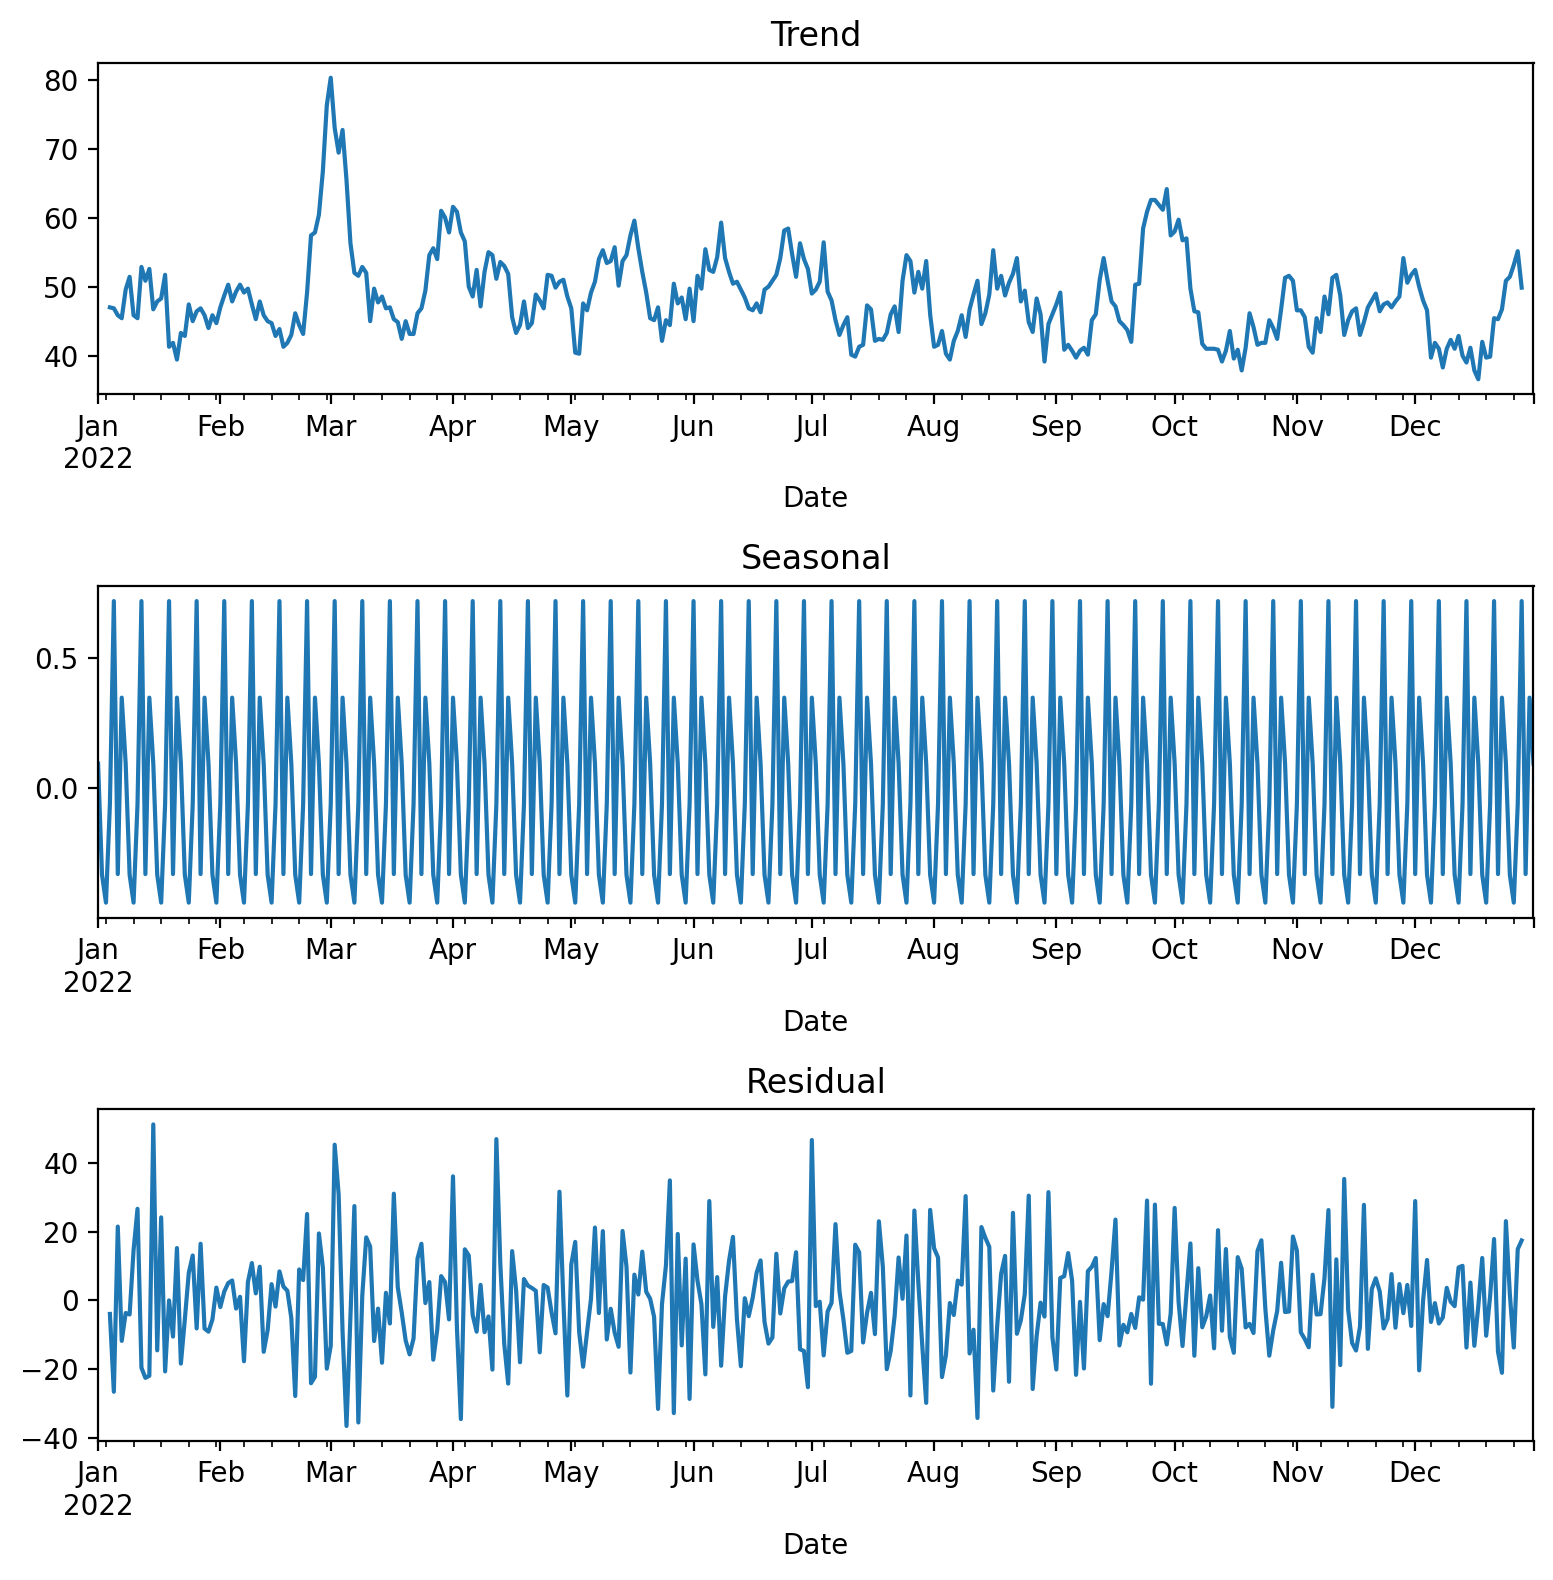

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df_regression.set_index(['Date']))

plt.figure(figsize=(8,8), dpi=200)

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residual')

plt.tight_layout()

In [36]:
setpoint = round(df_regression.shape[0] * 0.75)
df_train = df_regression[:setpoint]
df_val = df_regression[setpoint:].reset_index(drop=True)

In [37]:
df_train.head()

,Date,Qty
0,2022-01-01,47
1,2022-01-02,54
2,2022-01-03,63
3,2022-01-04,43
4,2022-01-05,21


In [38]:
df_val.tail()

,Date,Qty
86,2022-12-27,70
87,2022-12-28,68
88,2022-12-29,42
89,2022-12-30,40
90,2022-12-31,37


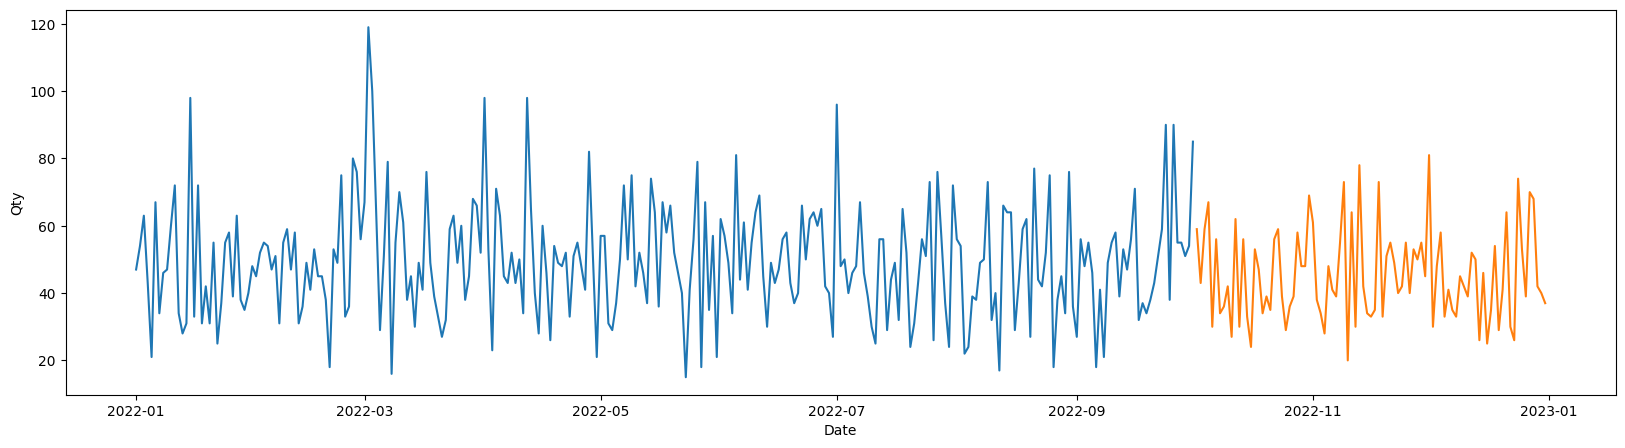

In [39]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty']);
sns.lineplot(data=df_val, x=df_val['Date'], y=df_val['Qty']);

## Create an ARIMA model

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
df_train = df_train.set_index('Date')
df_val = df_val.set_index('Date')

y_train = df_train['Qty']
y_val = df_val['Qty']

In [64]:
arima_model = ARIMA(y_train, order = (90,1,0))
arima_model = arima_model.fit( )

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

In [65]:
y_pred = arima_model.get_forecast(len(df_val))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = arima_model.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = df_val.index
y_pred_out = y_pred_df['predictions']

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
mae = mean_absolute_error(y_val, y_pred_out)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_out))

mae
rmse

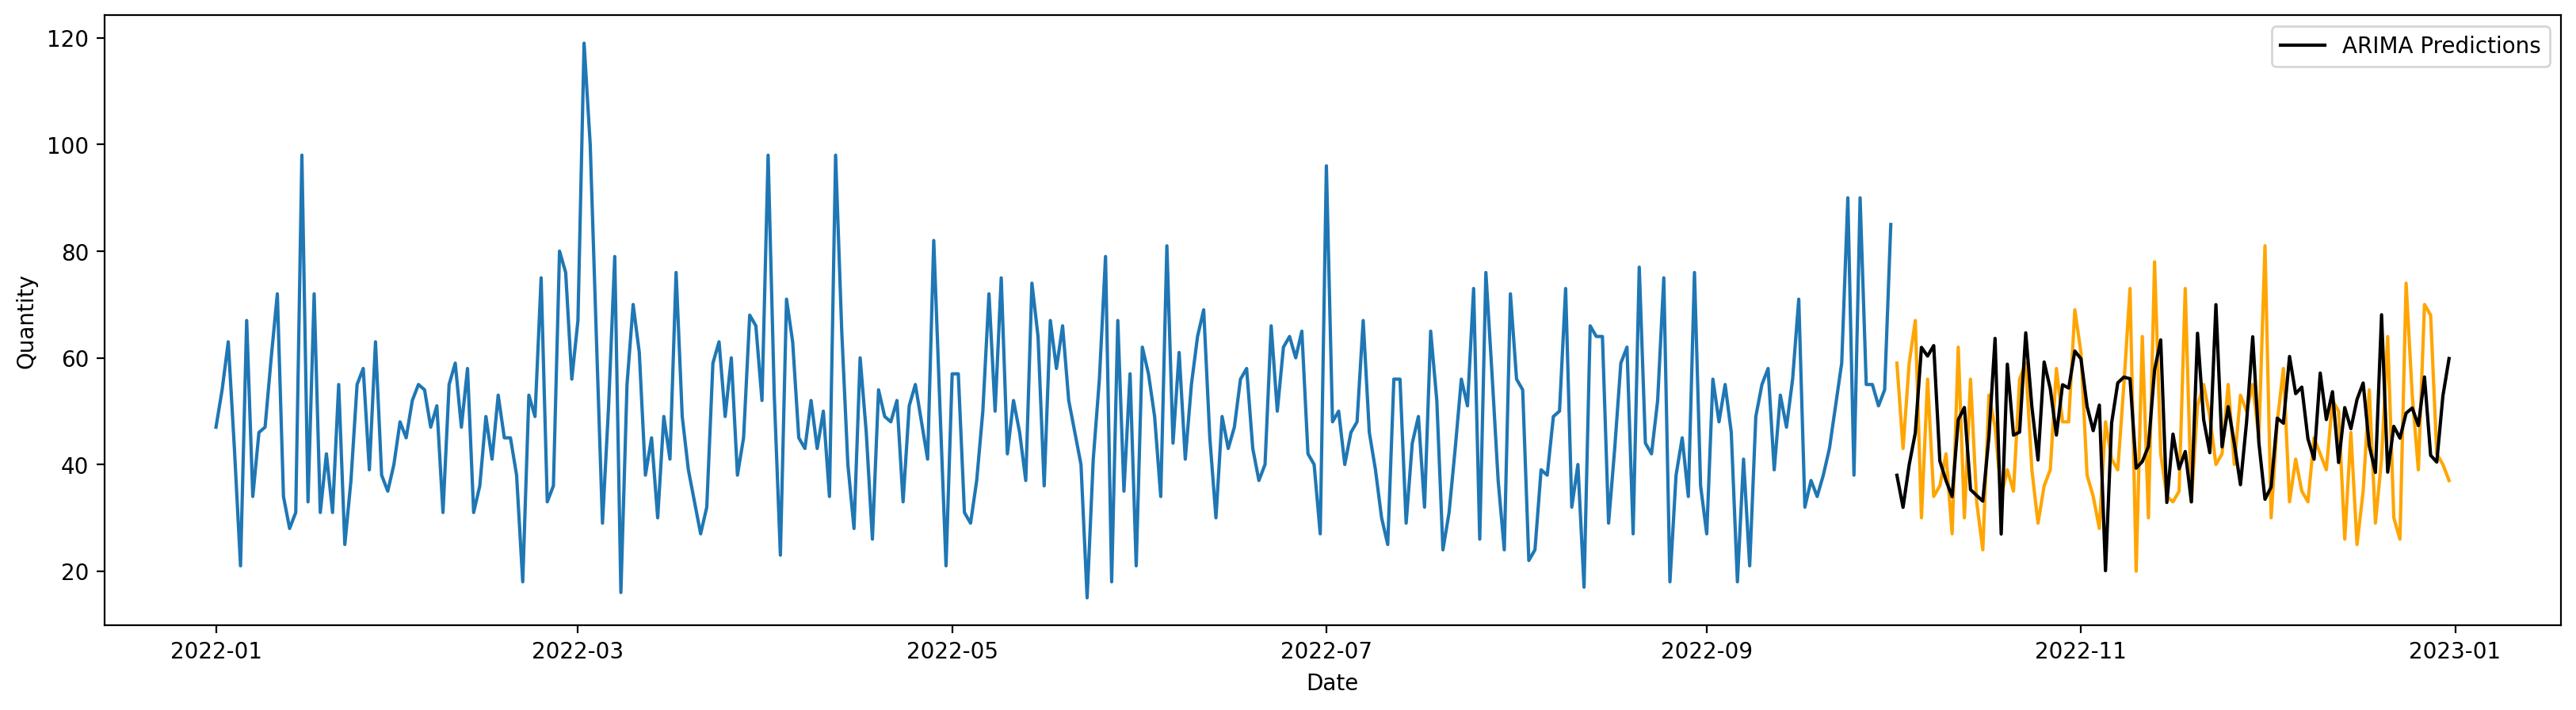

In [68]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(y_train)
plt.plot(y_val, color='orange')
plt.plot(y_pred_out, color='black', label='ARIMA Predictions')

plt.ylabel('Quantity')
plt.xlabel('Date')
plt.legend();

## Final Model

In [69]:
df_final = df_regression.copy().set_index('Date')

y_final = df_final['Qty']

In [70]:
final_model_arima = ARIMA(y_train, order = (90,1,0))
final_model_arima = final_model_arima.fit( )

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

In [71]:
y_pred_final = arima_model.get_forecast(90)

y_pred_final_df = y_pred.conf_int()
y_pred_final_df['predictions'] = final_model_arima.predict(start=y_pred_final_df.index[0], end=y_pred_final_df.index[-1])
y_pred_final_df.index = pd.date_range(start='01-01-2023', periods=91)
y_pred_final_out = y_pred_final_df['predictions']

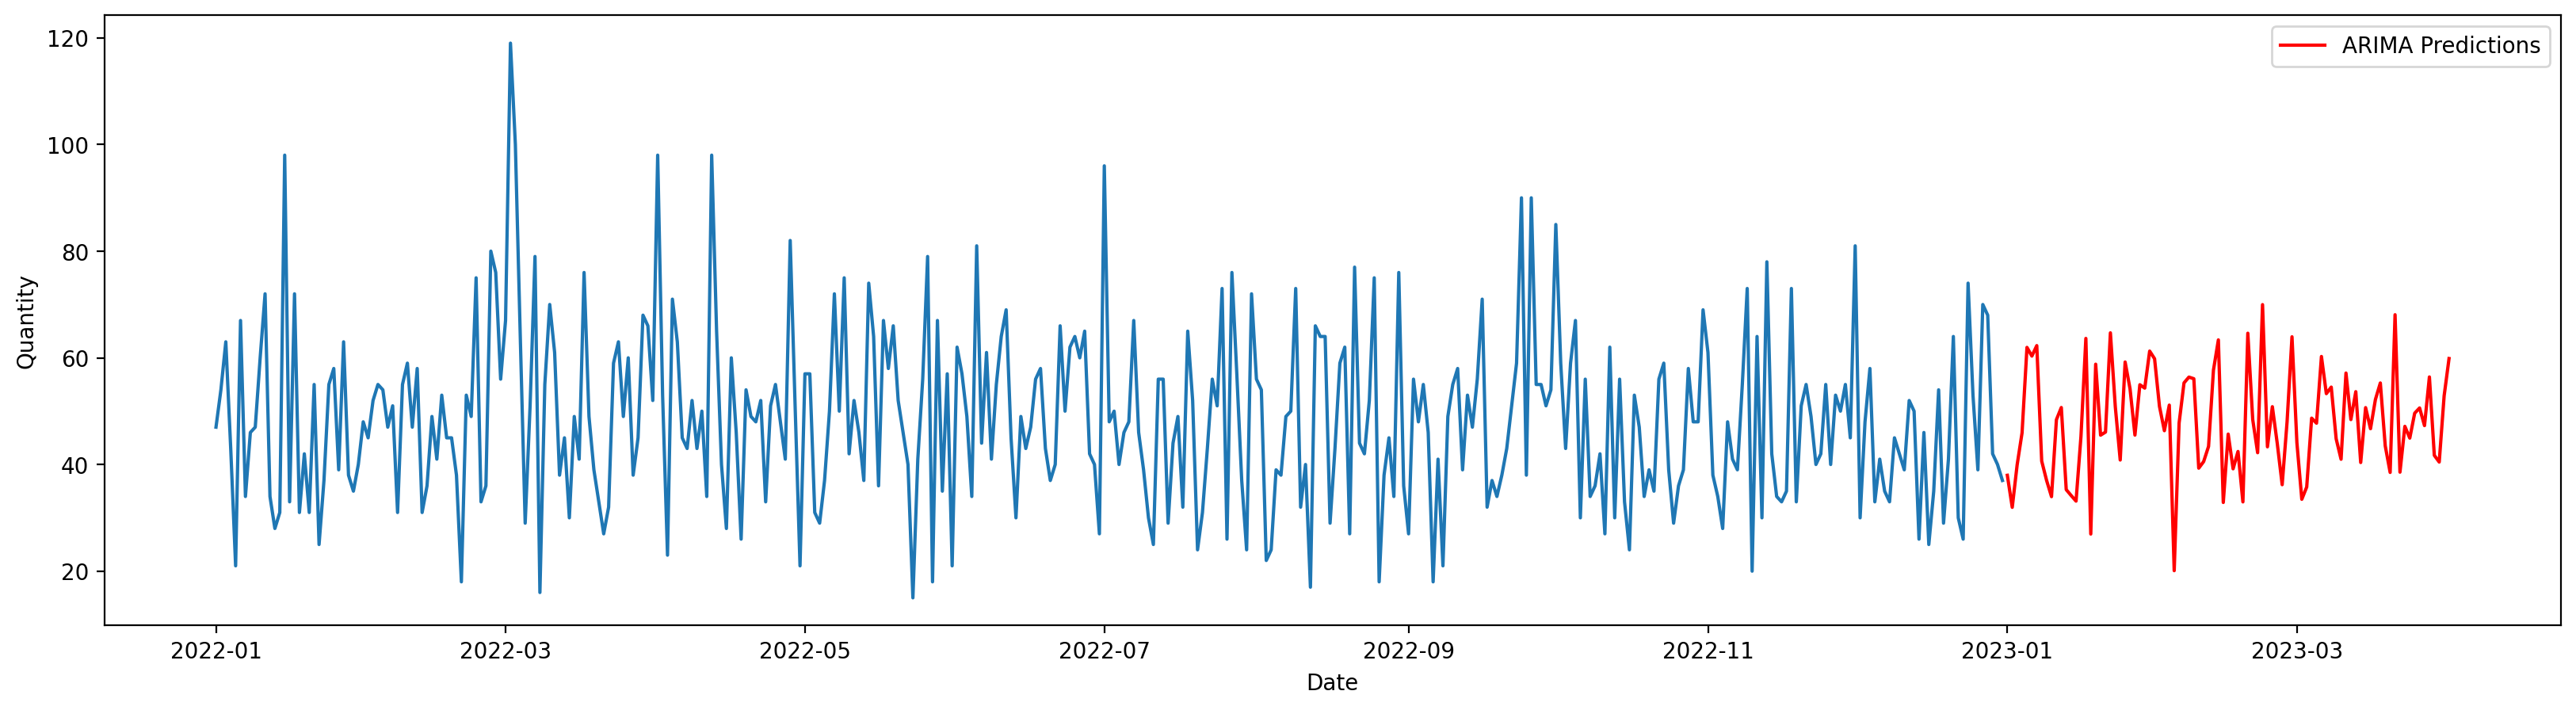

In [72]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(y_final)
plt.plot(y_pred_final_out, color='red', label='ARIMA Predictions')

plt.ylabel('Quantity')
plt.xlabel('Date')
plt.legend();

# Clustering

### Data Ingestion

In [73]:
df_clustering = df_merge.copy().groupby(['CustomerID']).agg({'TransactionID' : 'count', 'Qty' : 'sum', 'TotalAmount' : 'sum'}).reset_index()

In [74]:
df_clustering.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,12,56,382300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [75]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     444 non-null    int64
 1   TransactionID  444 non-null    int64
 2   Qty            444 non-null    int64
 3   TotalAmount    444 non-null    int64
dtypes: int64(4)
memory usage: 14.0 KB


In [76]:
df_clustering.describe()

,CustomerID,TransactionID,Qty,TotalAmount
count,444.000000,444.000000,444.000000,444.000000
mean,223.556306,10.954955,39.837838,352937.387387
std,128.475517,3.217860,12.612861,123576.141336
min,1.000000,3.000000,10.000000,84300.000000
25%,112.750000,9.000000,31.000000,263625.000000
50%,223.500000,11.000000,39.000000,340400.000000
75%,334.250000,13.000000,48.000000,435350.000000
max,447.000000,21.000000,79.000000,846700.000000


## Exploratory Data Analysis

<Axes: xlabel='Qty', ylabel='TotalAmount'>

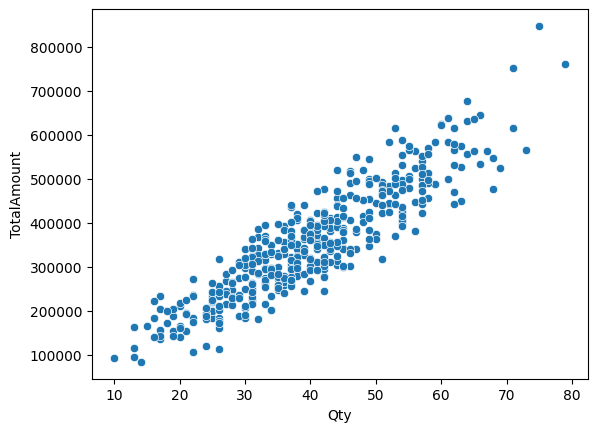

In [77]:
sns.scatterplot(data=df_clustering, x='Qty', y='TotalAmount')

<Axes: xlabel='Qty', ylabel='Count'>

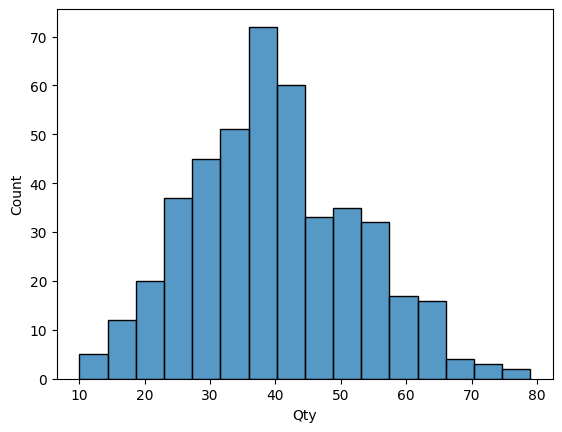

In [78]:
sns.histplot(data=df_clustering, x='Qty')

<Axes: xlabel='TotalAmount', ylabel='Count'>

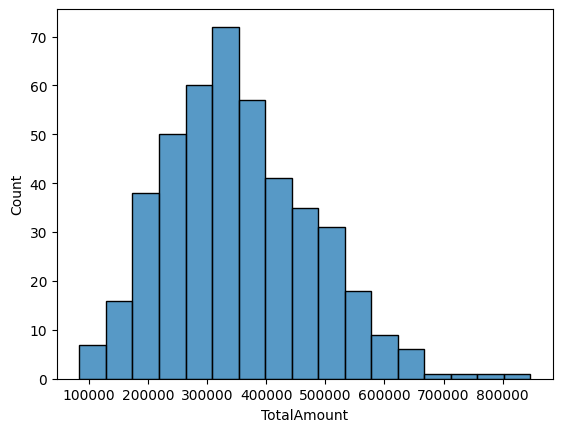

In [79]:
sns.histplot(data=df_clustering, x='TotalAmount')

## Feature Selection

Drop the Unique Feature, because it wont be used

In [80]:
X = df_clustering.copy().drop(['TransactionID', 'CustomerID'], axis=1)

In [81]:
X.head()

,Qty,TotalAmount
0,60,623300
1,56,382300
2,56,446200
3,46,302500
4,27,268600


## Scaling the Data

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [84]:
scaled_X

array([[ 1.6003432 ,  2.19029003],
       [ 1.28284884,  0.23787549],
       [ 1.28284884,  0.75554889],
       [ 0.48911293, -0.40860867],
       [-1.01898528, -0.68324291],
       [-0.22524938,  0.67858649],
       [ 1.20347525,  1.01965143],
       [ 0.33036575,  1.35018468],
       [ 0.33036575, -0.03027772],
       [-0.93961169, -0.85580071],
       [ 1.67971679,  1.85975678],
       [ 1.91783756,  2.2559106 ],
       [-0.62211733,  0.12607747],
       [ 0.33036575,  0.43635746],
       [ 0.8066073 ,  0.18359674],
       [ 0.09224498,  0.02967194],
       [ 0.33036575,  0.83413155],
       [ 1.83846397,  1.79575647],
       [ 0.7272337 ,  1.17924715],
       [-0.38399656, -0.42967206],
       [-0.30462297, -0.1493669 ],
       [ 1.20347525,  1.24405759],
       [-0.14587579, -0.10967051],
       [-2.36833631, -2.11312327],
       [-0.46337015, -0.96678859],
       [-0.62211733, -0.19878486],
       [-0.46337015, -0.1971646 ],
       [ 1.83846397,  0.77742241],
       [ 0.01287139,

## Modelling and Predictions

In [85]:
from sklearn.cluster import KMeans

In [86]:
ssd = []

for k in range(2,30):

    model = KMeans(n_clusters=k)


    model.fit(scaled_X)

    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, ' Sum of Squared Distances')

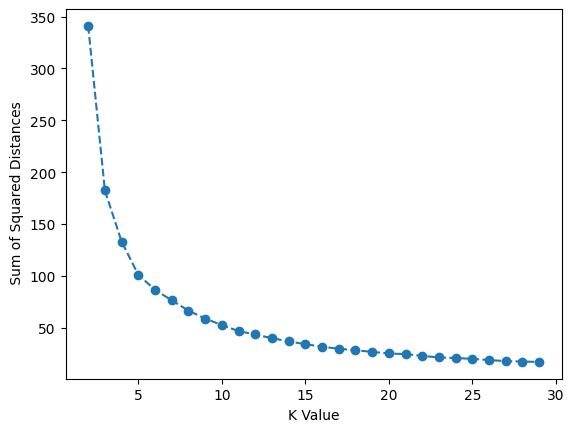

In [87]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<Axes: >

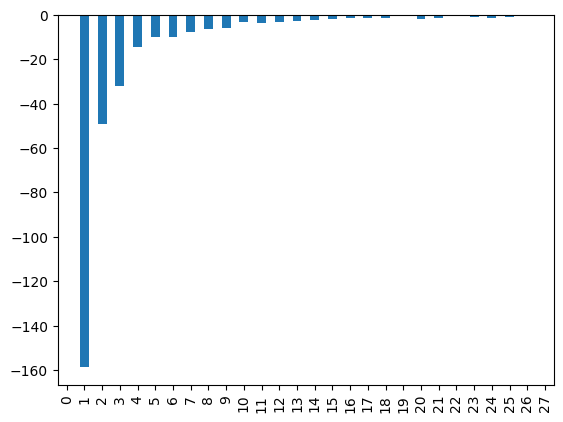

In [88]:
pd.Series(ssd).diff().plot(kind='bar')

In [89]:
model = KMeans(n_clusters=4)
model.fit(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [90]:
model.labels_

array([2, 1, 2, 3, 0, 1, 2, 1, 1, 0, 2, 2, 3, 1, 1, 3, 1, 2, 1, 3, 3, 2,
       3, 0, 3, 3, 3, 2, 3, 3, 3, 0, 2, 3, 3, 2, 3, 1, 3, 0, 1, 2, 2, 2,
       1, 2, 1, 3, 0, 1, 3, 3, 1, 3, 0, 1, 3, 0, 3, 3, 1, 2, 3, 0, 1, 2,
       0, 1, 3, 0, 2, 2, 0, 3, 1, 1, 0, 0, 3, 3, 3, 1, 2, 1, 3, 1, 2, 2,
       3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 1, 1, 3, 0, 0,
       2, 0, 2, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 0, 0, 1, 0, 1, 3, 1, 1, 2,
       3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 2, 3, 1, 0, 3, 1,
       2, 2, 2, 3, 1, 3, 3, 3, 3, 1, 2, 2, 3, 1, 0, 2, 2, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 2, 0, 1, 1, 3, 2, 3, 3, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 1, 3, 3, 1, 3, 1, 3, 0, 3, 2, 3, 3, 1, 3, 3, 0, 2, 1, 2, 3, 3,
       2, 3, 3, 3, 3, 0, 3, 1, 3, 1, 3, 2, 1, 2, 3, 1, 3, 1, 1, 3, 0, 1,
       1, 2, 1, 1, 3, 3, 3, 3, 3, 0, 3, 0, 1, 3, 3, 0, 2, 0, 0, 2, 1, 0,
       3, 1, 3, 1, 1, 3, 2, 1, 3, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 0, 3,
       3, 1, 0, 0, 0, 3, 3, 1, 3, 3, 3, 2, 0, 2, 3,

In [91]:
df_clustering['Clusters'] = model.labels_

In [92]:
df_clustering

,CustomerID,TransactionID,Qty,TotalAmount,Clusters
0,1,17,60,623300,2
1,2,12,56,382300,1
2,3,15,56,446200,2
3,4,10,46,302500,3
4,5,7,27,268600,0
...,...,...,...,...,...
439,442,13,37,269400,3
440,444,18,62,577700,2
441,445,17,62,530800,2
442,446,11,42,423300,1


In [93]:
df_clustering.groupby(['Clusters']).agg({'CustomerID': 'count', 'Qty': 'mean', 'TotalAmount': 'mean'})

,CustomerID,Qty,TotalAmount
Clusters,,,
0,94,23.627660,197854.255319
1,116,45.560345,410630.172414
2,77,59.207792,543838.961039
3,157,35.815287,309536.305732
